In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from terratorch.registry import BACKBONE_REGISTRY, DECODER_REGISTRY
from terratorch.models import EncoderDecoderFactory
from datamodules import BigEarthNetV2DataModule
import torch

import matplotlib.pyplot as plt

In [119]:
backbone = BACKBONE_REGISTRY.build(
    "timm_convnextv2_atto",
    pretrained=False,
    in_chans=3
)

decoder = DECODER_REGISTRY.build(
    "UperNetDecoder",
    channels=128,
    embed_dim=[40, 80, 160, 320],
)

model = EncoderDecoderFactory().build_model(
    task="segmentation",
    backbone=backbone,
    decoder=decoder,
    num_classes=2,
    head_channel_list=[128]
)

state_dict = torch.load("experiments/etci2021/version_20/checkpoints/epoch=99-step=4300.ckpt")["state_dict"]
for key in list(state_dict.keys()):
    if key.startswith("model."):
        new_key = key.removeprefix("model.")
        state_dict[new_key] = state_dict.pop(key)

model.load_state_dict(state_dict)

<All keys matched successfully>

In [31]:
datamodule = BigEarthNetV2DataModule(
    root="/share/projects/datasets/BigEarthNet/",
    batch_size=4,
    num_workers=0)
datamodule.setup(stage="fit")

In [34]:
iterator = iter(datamodule.train_dataloader())

In [44]:
next(iterator)["label"]

tensor([[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]])

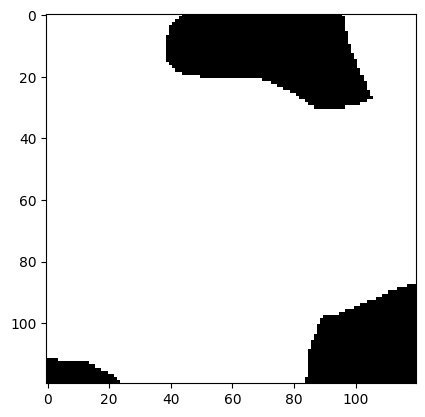

In [40]:
plt.imshow(next(iterator)["mask"][1].squeeze().numpy(), cmap='gray')

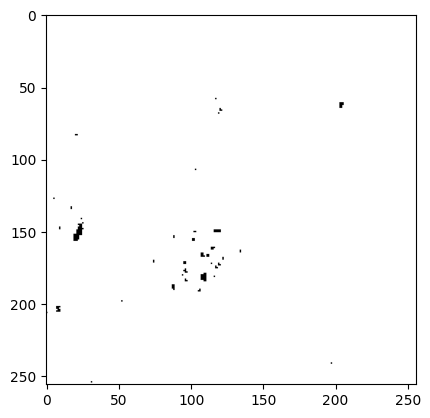

In [132]:
plt.imshow(vh > vv, cmap='gray')